<a href="https://colab.research.google.com/github/abdinegara783/ML-Mentoring-Platform-Dicoding/blob/main/Recommender_System_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd

In [2]:
mentor=pd.read_csv('mentors.csv')
mentor.head(5)

,name,company,user_headline,review_at,occupation,last_education,profile
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk.",External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,NaN,<ul><li>Bangkit Graduate 2021 - Android Learni...
1,Abdul Chathil,University of Muhammadiyah Malang,Mobile Developer at Bhinneka.com,Memulai Pemrograman Dengan Swift,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,<ul><li>Associate Android Developer</li><li>Mo...
2,Abdul Malik,SMK Media Informatika,Self-employed,Menjadi React Web Developer Expert\nBelajar Me...,Belum/Tidak Bekerja,DIPLOMA_IV_OR_STRATA_I,<p>A self-taught <strong>Frontend Developer</s...
3,Abraham Bulyan Zebua,Pharmaniaga,make something from nothing,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,DIPLOMA_IV_OR_STRATA_I,<p>I love design and make new things especiall...
4,Abrar Wiryawan,Universitas Negeri Jakarta,External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,<ul><li>Android Enthusiast</li><li>Kotlin Enth...


In [3]:
mentor['occupation'].unique()

array(['Android Developer', 'Pelajar/Mahasiswa', 'Belum/Tidak Bekerja',
       'Wirausaha/Entrepreneur/Founder', 'Peneliti',
       'Front-End Developer', 'Data Scientist', 'Programmer',
       'Mobile Apps Developer', 'Software Engineer', 'Karyawan Swasta',
       'Lainnya', 'Dosen', 'DevOps', 'Back-End Developer',
       'Full-Stack Developer', 'Chief Technical Officers (CTO)',
       'Web Engineer', 'UI/UX Designer', 'Web Developer',
       'Cloud Engineer', 'Data Engineer', 'Pekerja Lepas / Freelance',
       'Karyawan Honorer', 'Guru', 'Pegawai Negeri Sipil',
       'Quality Assurance (QA)', 'Data Analyst',
       'Chief Information Officers (CIO)', 'Konsultan'], dtype=object)

In [4]:
mentees=pd.read_csv('mentees.csv')
mentees.head(5)

,Name,course_enrolled,course_graduated
0,hafizhan shidqi,Belajar Membangun LINE Chatbot,Belajar Membangun LINE Chatbot
1,gandhi wibowo,Belajar Membuat Aplikasi Android untuk Pemula\...,"Belajar Membuat Aplikasi Android untuk Pemula,..."
2,aldio mahendra purwandrarto,Belajar Membuat Augmented Reality,Belajar Membuat Augmented Reality
3,benny putra,Menjadi Azure Cloud Developer,Menjadi Azure Cloud Developer
4,vicky vernando dasta,Belajar Membangun LINE Chatbot\nBelajar Dasar ...,"Belajar Membangun LINE Chatbot,Belajar Dasar P..."


In [5]:
mentor_profile=pd.read_csv('mentor_profiles.csv')
mentor_profile.head(5)

,Name,Profile Picture
0,Mentor,https://images.unsplash.com/photo-168417187429...
1,Mentor,https://secure.insightexpressai.com/adServer/a...
2,Mentor,https://secure.insightexpressai.com/adServer/a...
3,Mentor,https://images.unsplash.com/photo-168400794545...
4,Mentor,https://images.unsplash.com/photo-168382636814...


In [6]:
mentees_profile=pd.read_csv('mentees_profiles.csv')
mentees_profile.head(5)

,Name,Profile Picture
0,Mentees,https://images.unsplash.com/profile-1664512708...
1,Mentees,https://images.unsplash.com/photo-168303347338...
2,Mentees,https://images.unsplash.com/photo-168274048986...
3,Mentees,https://images.unsplash.com/photo-168147495221...
4,Mentees,https://sb.scorecardresearch.com/p?c1=2&c2=323...


# Preprocessing Data Mentor

In [7]:
from bs4 import BeautifulSoup

def remove_html_tags(data, column):
    data[column] = data[column].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if isinstance(x, str) else x)
    return data

# Mengisi nilai NaN dengan string kosong
mentor['profile'] = mentor['profile'].fillna('')

# Memanggil fungsi untuk menghilangkan tag HTML pada kolom "profile"
mentor = remove_html_tags(mentor, 'profile')

# Menampilkan hasil
print(mentor)


                        name                            company  \
0         Abdan Zaki Alifian   PT. Bank MNC Internasional, Tbk.   
1              Abdul Chathil  University of Muhammadiyah Malang   
2                Abdul Malik              SMK Media Informatika   
3       Abraham Bulyan Zebua                        Pharmaniaga   
4             Abrar Wiryawan         Universitas Negeri Jakarta   
..                       ...                                ...   
158  Yusril Adriansyah Putra        Universitas Negeri Surabaya   
159             Yusuf Fazeri                         Karyakarsa   
160   Zanuar Ekaputra Rus'an                 Dicoding Indonesia   
161       Zidni Rif'an Ifana      PT Solusi Konvergen Indonesia   
162        Zulfikar Mauludin                                BWA   

                                         user_headline  \
0         External Code Reviewer at Dicoding Indonesia   
1                     Mobile Developer at Bhinneka.com   
2                    

In [8]:
mentor['name']

0           Abdan Zaki Alifian
1                Abdul Chathil
2                  Abdul Malik
3         Abraham Bulyan Zebua
4               Abrar Wiryawan
                ...           
158    Yusril Adriansyah Putra
159               Yusuf Fazeri
160     Zanuar Ekaputra Rus'an
161         Zidni Rif'an Ifana
162          Zulfikar Mauludin
Name: name, Length: 163, dtype: object

In [9]:
def check_missing_values(data):
    missing_values = data.isnull().sum()
    total_values = data.shape[0]
    missing_percentage = (missing_values / total_values) * 100

    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Total Values': total_values,
        'Missing Percentage': missing_percentage
    })

    return missing_data

# Contoh penggunaan
missing_data = check_missing_values(mentor)
print(missing_data)


                Missing Values  Total Values  Missing Percentage
name                         0           163            0.000000
company                      2           163            1.226994
user_headline               13           163            7.975460
review_at                    0           163            0.000000
occupation                   0           163            0.000000
last_education               2           163            1.226994
profile                      0           163            0.000000


Dari sini, kita akan membuat sebuah feature baru berupa feature "preferensi" merupakan gabungan dari beberapa feature untuk menemukan kecocokan

In [10]:
mentor['about'] = mentor[['company', 'user_headline', 'review_at', 'occupation', 'profile']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [11]:
df_mentor = mentor[['name','about']]

In [12]:
df_mentor['Pictures']=mentor_profile['Profile Picture']

<ipython-input-12-d3a11fb6780e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['Pictures']=mentor_profile['Profile Picture']


In [27]:
import random

# Generate random rating for mentors in df_mentor
df_mentor['rating'] = [round(random.uniform(3.0, 5.0), 1) for _ in range(len(df_mentor))]

<ipython-input-27-2742452809f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['rating'] = [round(random.uniform(3.0, 5.0), 1) for _ in range(len(df_mentor))]


In [28]:
df_mentor

,name,about,Pictures,rating,Learning_path,ID,experience_level,Jobs,skills
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk., External Cod...",https://images.unsplash.com/photo-168417187429...,4.6,[Android],TTA08,expert,Android Developer,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
1,Abdul Chathil,"University of Muhammadiyah Malang, Mobile Deve...",https://secure.insightexpressai.com/adServer/a...,4.7,[Android],VZC47,expert,Pelajar/Mahasiswa,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
2,Abdul Malik,"SMK Media Informatika, Self-employed, Menjadi ...",https://secure.insightexpressai.com/adServer/a...,4.0,"[Front-End, web]",XHP50,expert,Belum/Tidak Bekerja,"[HTML/CSS, JavaScript, ReactJS, AngularJS, Vue..."
3,Abraham Bulyan Zebua,"Pharmaniaga, make something from nothing, Bela...",https://images.unsplash.com/photo-168400794545...,4.0,"[Android, Front-End, Back-End, web]",ZEZ09,expert,Android Developer,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
4,Abrar Wiryawan,"Universitas Negeri Jakarta, External Code Revi...",https://images.unsplash.com/photo-168382636814...,3.4,[Android],HDH00,expert,Pelajar/Mahasiswa,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
...,...,...,...,...,...,...,...,...,...
157,Yudistiro Septian Dwi Saputro,"Stockbit, Android Engineer at Stockbit, Belaja...",https://images.unsplash.com/profile-1503350572...,3.5,[Android],DYC67,expert,Android Developer,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
158,Yusril Adriansyah Putra,"Universitas Negeri Surabaya, External Code Rev...",https://images.unsplash.com/photo-168399899433...,4.2,"[Front-End, Back-End, Cloud, web]",JLG94,expert,Back-End Developer,"[HTML/CSS, JavaScript, ReactJS, AngularJS, Vue..."
159,Yusuf Fazeri,"Karyakarsa, Instructor at Codepolitan, Belajar...",https://images.unsplash.com/placeholder-avatar...,4.9,[web],ZPP13,expert,Web Developer,"[HTML/CSS, JavaScript, Node.js, ReactJS, Angul..."
160,Zanuar Ekaputra Rus'an,"Dicoding Indonesia, Software Engineer, Reviewe...",https://images.unsplash.com/placeholder-avatar...,3.8,"[Front-End, Cloud, Machine Learning, web]",YJO45,expert,Software Engineer,"[HTML/CSS, JavaScript, ReactJS, AngularJS, Vue..."


Menambahkan kolom `tag` pada dataframe

In [15]:
# List kata-kata tag
list_tag = ["Android", "Front-End", "Back-End", "iOS", "Cloud", "Machine Learning", "UI/UX",'Game','web','analys'] 

# Fungsi untuk mencari kata dalam preferensi
def cari_kata(preferensi):
    kata_ditemukan = []
    preferensi_lower = preferensi.lower() # Mengubah preferensi menjadi huruf kecil
    
    for tag in list_tag:
        tag_lower = tag.lower() # Mengubah tag menjadi huruf kecil
        
        if tag_lower in preferensi_lower:
            kata_ditemukan.append(tag)
    
    return kata_ditemukan

# Membuat kolom tag
df_mentor['Learning_path'] = df_mentor['about'].apply(cari_kata)



<ipython-input-15-fc5cdd39a81c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['Learning_path'] = df_mentor['about'].apply(cari_kata)


In [16]:
df_mentor

,name,about,Pictures,rating,Learning_path
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk., External Cod...",https://images.unsplash.com/photo-168417187429...,4.7,[Android]
1,Abdul Chathil,"University of Muhammadiyah Malang, Mobile Deve...",https://secure.insightexpressai.com/adServer/a...,4.7,[Android]
2,Abdul Malik,"SMK Media Informatika, Self-employed, Menjadi ...",https://secure.insightexpressai.com/adServer/a...,3.1,"[Front-End, web]"
3,Abraham Bulyan Zebua,"Pharmaniaga, make something from nothing, Bela...",https://images.unsplash.com/photo-168400794545...,3.7,"[Android, Front-End, Back-End, web]"
4,Abrar Wiryawan,"Universitas Negeri Jakarta, External Code Revi...",https://images.unsplash.com/photo-168382636814...,4.6,[Android]
...,...,...,...,...,...
158,Yusril Adriansyah Putra,"Universitas Negeri Surabaya, External Code Rev...",https://images.unsplash.com/photo-168399899433...,4.0,"[Front-End, Back-End, Cloud, web]"
159,Yusuf Fazeri,"Karyakarsa, Instructor at Codepolitan, Belajar...",https://images.unsplash.com/placeholder-avatar...,3.3,[web]
160,Zanuar Ekaputra Rus'an,"Dicoding Indonesia, Software Engineer, Reviewe...",https://images.unsplash.com/placeholder-avatar...,4.2,"[Front-End, Cloud, Machine Learning, web]"
161,Zidni Rif'an Ifana,"PT Solusi Konvergen Indonesia, External Code R...",https://images.unsplash.com/profile-1451673365...,4.5,"[Back-End, Cloud]"


In [17]:
import pandas as pd
import random
import string

def generate_dummy_data():
    letters = ''.join(random.choices(string.ascii_uppercase, k=3))
    numbers = ''.join(random.choices(string.digits, k=2))
    dummy_id = letters + numbers

    # Tambahkan logika untuk fitur data lainnya sesuai kebutuhan

    dummy_data = {
        'ID': dummy_id,
        # Tambahkan fitur data lainnya sesuai kebutuhan
    }

    return dummy_data
  # Buat DataFrame kosong

# Mengisi kolom 'ID' dengan data dummy
df_mentor1 = []
df_mentor1 = [generate_dummy_data()['ID'] for _ in range(163)]  # Ubah 10 sesuai dengan jumlah data yang diinginkan
df_mentor1 = pd.DataFrame({'ID': df_mentor1})



In [18]:
df_mentor = pd.concat([df_mentor, df_mentor1], axis=1)

In [19]:
df_mentor

,name,about,Pictures,rating,Learning_path,ID
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk., External Cod...",https://images.unsplash.com/photo-168417187429...,4.7,[Android],TTA08
1,Abdul Chathil,"University of Muhammadiyah Malang, Mobile Deve...",https://secure.insightexpressai.com/adServer/a...,4.7,[Android],VZC47
2,Abdul Malik,"SMK Media Informatika, Self-employed, Menjadi ...",https://secure.insightexpressai.com/adServer/a...,3.1,"[Front-End, web]",XHP50
3,Abraham Bulyan Zebua,"Pharmaniaga, make something from nothing, Bela...",https://images.unsplash.com/photo-168400794545...,3.7,"[Android, Front-End, Back-End, web]",ZEZ09
4,Abrar Wiryawan,"Universitas Negeri Jakarta, External Code Revi...",https://images.unsplash.com/photo-168382636814...,4.6,[Android],HDH00
...,...,...,...,...,...,...
158,Yusril Adriansyah Putra,"Universitas Negeri Surabaya, External Code Rev...",https://images.unsplash.com/photo-168399899433...,4.0,"[Front-End, Back-End, Cloud, web]",JLG94
159,Yusuf Fazeri,"Karyakarsa, Instructor at Codepolitan, Belajar...",https://images.unsplash.com/placeholder-avatar...,3.3,[web],ZPP13
160,Zanuar Ekaputra Rus'an,"Dicoding Indonesia, Software Engineer, Reviewe...",https://images.unsplash.com/placeholder-avatar...,4.2,"[Front-End, Cloud, Machine Learning, web]",YJO45
161,Zidni Rif'an Ifana,"PT Solusi Konvergen Indonesia, External Code R...",https://images.unsplash.com/profile-1451673365...,4.5,"[Back-End, Cloud]",VHE75


In [20]:
import pandas as pd
import random


# Persentase Experience level
expert_percentage = 0.7
intermediate_percentage = 0.2
beginner_percentage = 0.1

# Jumlah total data
total_data = len(df_mentor)   # Mengurangi satu data

# Menghitung jumlah data berdasarkan persentase
expert_count = int(total_data * expert_percentage)
intermediate_count = int(total_data * intermediate_percentage)
beginner_count = int(total_data * beginner_percentage)

# Membuat list Experience level
experience_levels = (["expert"] * expert_count) + (["intermediate"] * intermediate_count) + (["beginner"] * beginner_count)

# Mengacak urutan data
random.shuffle(experience_levels)

# Mengurangi satu data dari DataFrame df_mentor
df_mentor = df_mentor.iloc[:-1, :]

# Memasukkan variabel dummy "experience_level" ke dalam kolom "experience_level" DataFrame df_mentor
df_mentor['experience_level'] = experience_levels

# Tampilkan DataFrame
print(df_mentor)


                              name  \
0               Abdan Zaki Alifian   
1                    Abdul Chathil   
2                      Abdul Malik   
3             Abraham Bulyan Zebua   
4                   Abrar Wiryawan   
..                             ...   
157  Yudistiro Septian Dwi Saputro   
158        Yusril Adriansyah Putra   
159                   Yusuf Fazeri   
160         Zanuar Ekaputra Rus'an   
161             Zidni Rif'an Ifana   

                                                 about  \
0    PT. Bank MNC Internasional, Tbk., External Cod...   
1    University of Muhammadiyah Malang, Mobile Deve...   
2    SMK Media Informatika, Self-employed, Menjadi ...   
3    Pharmaniaga, make something from nothing, Bela...   
4    Universitas Negeri Jakarta, External Code Revi...   
..                                                 ...   
157  Stockbit, Android Engineer at Stockbit, Belaja...   
158  Universitas Negeri Surabaya, External Code Rev...   
159  Karyakarsa, Inst

<ipython-input-20-11106e391031>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['experience_level'] = experience_levels


In [21]:
df_mentor['Jobs']=mentor['occupation']

<ipython-input-21-61092efec63e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['Jobs']=mentor['occupation']


In [22]:
df_mentor

,name,about,Pictures,rating,Learning_path,ID,experience_level,Jobs
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk., External Cod...",https://images.unsplash.com/photo-168417187429...,4.7,[Android],TTA08,expert,Android Developer
1,Abdul Chathil,"University of Muhammadiyah Malang, Mobile Deve...",https://secure.insightexpressai.com/adServer/a...,4.7,[Android],VZC47,expert,Pelajar/Mahasiswa
2,Abdul Malik,"SMK Media Informatika, Self-employed, Menjadi ...",https://secure.insightexpressai.com/adServer/a...,3.1,"[Front-End, web]",XHP50,expert,Belum/Tidak Bekerja
3,Abraham Bulyan Zebua,"Pharmaniaga, make something from nothing, Bela...",https://images.unsplash.com/photo-168400794545...,3.7,"[Android, Front-End, Back-End, web]",ZEZ09,expert,Android Developer
4,Abrar Wiryawan,"Universitas Negeri Jakarta, External Code Revi...",https://images.unsplash.com/photo-168382636814...,4.6,[Android],HDH00,expert,Pelajar/Mahasiswa
...,...,...,...,...,...,...,...,...
157,Yudistiro Septian Dwi Saputro,"Stockbit, Android Engineer at Stockbit, Belaja...",https://images.unsplash.com/profile-1503350572...,4.1,[Android],DYC67,expert,Android Developer
158,Yusril Adriansyah Putra,"Universitas Negeri Surabaya, External Code Rev...",https://images.unsplash.com/photo-168399899433...,4.0,"[Front-End, Back-End, Cloud, web]",JLG94,expert,Back-End Developer
159,Yusuf Fazeri,"Karyakarsa, Instructor at Codepolitan, Belajar...",https://images.unsplash.com/placeholder-avatar...,3.3,[web],ZPP13,expert,Web Developer
160,Zanuar Ekaputra Rus'an,"Dicoding Indonesia, Software Engineer, Reviewe...",https://images.unsplash.com/placeholder-avatar...,4.2,"[Front-End, Cloud, Machine Learning, web]",YJO45,expert,Software Engineer


In [23]:
list_tag = ["Android", "Front-End", "Back-End", "iOS", "Cloud", "Machine Learning", "UI/UX", "Game", "web", "analys"]

skills_Android = ['HTML/CSS', 'Java', 'Kotlin', 'XML', 'Android Studio', 'Firebase', 'SQLite', 'RESTful API', 'JSON', 'Git']
skills_Front_End = ['HTML/CSS', 'JavaScript', 'ReactJS', 'AngularJS', 'VueJS', 'Bootstrap', 'Sass', 'Webpack', 'Responsive Design', 'Git']
skills_Back_End = ['JavaScript', 'Node.js', 'Express.js', 'Java', 'Spring Boot', 'Python', 'Django', 'RESTful API', 'SQL', 'MongoDB']
skills_iOS = ['Swift', 'Objective-C', 'Xcode', 'UIKit', 'Core Data', 'Cocoa Touch', 'RESTful API', 'JSON', 'Git', 'Firebase']
skills_Cloud = ['Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud Platform', 'Docker', 'Kubernetes', 'Serverless Computing', 'CI/CD', 'Networking', 'Load Balancing', 'Security']
skills_Machine_Learning = ['Python', 'NumPy', 'Pandas', 'Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Data Preprocessing', 'Model Evaluation', 'Deep Learning']
skills_UI_UX = ['User Research', 'Wireframing', 'Prototyping', 'Interaction Design', 'Visual Design', 'User Testing', 'Adobe XD', 'Sketch', 'Figma', 'InVision']
skills_Game = ['Unity', 'C#', 'Game Development', '2D Graphics', '3D Modeling', 'Game Physics', 'Animation', 'Scripting', 'Level Design', 'Game Testing']
skills_web = ['HTML/CSS', 'JavaScript', 'Node.js', 'ReactJS', 'AngularJS', 'VueJS', 'PHP', 'MySQL', 'RESTful API', 'Git']
skills_analys = ['Data Analysis', 'Statistical Analysis', 'Data Visualization', 'Python', 'R', 'SQL', 'Excel', 'Tableau', 'Power BI', 'Machine Learning']

In [24]:
# Fungsi untuk mendapatkan skills berdasarkan Learning_path
def get_skills(learning_path):
    skills = []
    for tag in learning_path:
        if tag == "Android":
            skills.extend(skills_Android)
        elif tag == "Front-End":
            skills.extend(skills_Front_End)
        elif tag == "Back-End":
            skills.extend(skills_Back_End)
        elif tag == "iOS":
            skills.extend(skills_iOS)
        elif tag == "Cloud":
            skills.extend(skills_Cloud)
        elif tag == "Machine Learning":
            skills.extend(skills_Machine_Learning)
        elif tag == "UI/UX":
            skills.extend(skills_UI_UX)
        elif tag == "Game":
            skills.extend(skills_Game)
        elif tag == "web":
            skills.extend(skills_web)
        elif tag == "analys":
            skills.extend(skills_analys)
    return skills

# Menambahkan kolom "skills" berdasarkan Learning_path
df_mentor['skills'] = df_mentor['Learning_path'].apply(get_skills)


<ipython-input-24-1a653434da19>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['skills'] = df_mentor['Learning_path'].apply(get_skills)


In [25]:
df_mentor

,name,about,Pictures,rating,Learning_path,ID,experience_level,Jobs,skills
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk., External Cod...",https://images.unsplash.com/photo-168417187429...,4.7,[Android],TTA08,expert,Android Developer,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
1,Abdul Chathil,"University of Muhammadiyah Malang, Mobile Deve...",https://secure.insightexpressai.com/adServer/a...,4.7,[Android],VZC47,expert,Pelajar/Mahasiswa,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
2,Abdul Malik,"SMK Media Informatika, Self-employed, Menjadi ...",https://secure.insightexpressai.com/adServer/a...,3.1,"[Front-End, web]",XHP50,expert,Belum/Tidak Bekerja,"[HTML/CSS, JavaScript, ReactJS, AngularJS, Vue..."
3,Abraham Bulyan Zebua,"Pharmaniaga, make something from nothing, Bela...",https://images.unsplash.com/photo-168400794545...,3.7,"[Android, Front-End, Back-End, web]",ZEZ09,expert,Android Developer,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
4,Abrar Wiryawan,"Universitas Negeri Jakarta, External Code Revi...",https://images.unsplash.com/photo-168382636814...,4.6,[Android],HDH00,expert,Pelajar/Mahasiswa,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
...,...,...,...,...,...,...,...,...,...
157,Yudistiro Septian Dwi Saputro,"Stockbit, Android Engineer at Stockbit, Belaja...",https://images.unsplash.com/profile-1503350572...,4.1,[Android],DYC67,expert,Android Developer,"[HTML/CSS, Java, Kotlin, XML, Android Studio, ..."
158,Yusril Adriansyah Putra,"Universitas Negeri Surabaya, External Code Rev...",https://images.unsplash.com/photo-168399899433...,4.0,"[Front-End, Back-End, Cloud, web]",JLG94,expert,Back-End Developer,"[HTML/CSS, JavaScript, ReactJS, AngularJS, Vue..."
159,Yusuf Fazeri,"Karyakarsa, Instructor at Codepolitan, Belajar...",https://images.unsplash.com/placeholder-avatar...,3.3,[web],ZPP13,expert,Web Developer,"[HTML/CSS, JavaScript, Node.js, ReactJS, Angul..."
160,Zanuar Ekaputra Rus'an,"Dicoding Indonesia, Software Engineer, Reviewe...",https://images.unsplash.com/placeholder-avatar...,4.2,"[Front-End, Cloud, Machine Learning, web]",YJO45,expert,Software Engineer,"[HTML/CSS, JavaScript, ReactJS, AngularJS, Vue..."


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
df_mentor.to_csv('df_mentor_fix1.csv', index=False)

In [29]:
import nltk
nltk.download('stopwords')

nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

class Mentee:
    def __init__(self, name, needs):
        self.name = name
        self.needs = needs

class Mentor:
    def __init__(self, name, expertise, rating):
        self.name = name
        self.expertise = expertise
        self.rating = rating

class MentoringPlatform:
    def __init__(self):
        self.mentees = []
        self.mentors = []
        self.vectorizer = TfidfVectorizer()

    def add_mentee(self, mentee):
        self.mentees.append(mentee)

    def add_mentor(self, mentor):
        self.mentors.append(mentor)

    def preprocess_text(self, text):
        stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        preprocessed_text = ' '.join(filtered_tokens)
        return preprocessed_text

    def fit_vectorizer(self):
        corpus = []
        for mentee in self.mentees:
            corpus.append(self.preprocess_text(mentee.needs))
        for mentor in self.mentors:
            corpus.append(self.preprocess_text(mentor.expertise))
        self.vectorizer.fit(corpus)

    def find_mentor(self, mentee):
        mentee_needs = self.preprocess_text(mentee.needs)
        mentee_vector = self.vectorizer.transform([mentee_needs])

        matched_mentors = []
        for mentor in self.mentors:
            mentor_expertise = self.preprocess_text(mentor.expertise)
            mentor_vector = self.vectorizer.transform([mentor_expertise])

            similarity_score = cosine_similarity(mentee_vector, mentor_vector)[0][0]
            if similarity_score > 0:
                matched_mentors.append((mentor, similarity_score))
        matched_mentors = sorted(matched_mentors, key=lambda x: (x[1] + x[0].rating), reverse=True)

        return matched_mentors

# Contoh penggunaan:
platform = MentoringPlatform()

# Menambahkan mentees dan mentors ke platform
mentee1 = Mentee("Mentee 1", "Bagaimana cara saya bisa menjadi seorang Android Developer yang memiliki portofolio yang baik?")
mentee2 = Mentee("Mentee 2", "Saya membutuhkan bimbingan dalam pengembangan Software Engineer")
mentee3 = Mentee("Mentee 3", " I want to looking for a mentor who experience with Cloud Arsect")
platform.add_mentee(mentee1)
platform.add_mentee(mentee2)
platform.add_mentee(mentee3)

for index, row in df_mentor.iterrows():
    mentor_expertise = ' '.join(row['about'].split()[:10])  # Mengambil maksimal 10 kata dari mentor.expertise
    mentor = Mentor(row['name'], mentor_expertise, row['rating'])
    platform.add_mentor(mentor)

# Fitting vectorizer
platform.fit_vectorizer()

# Melakukan pencocokan mentee dengan mentor
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        print(f"Mentee '{mentee.name}' cocok dengan mentor:")
        for mentor, similarity_score in matched_mentors:
            mentor_info = df_mentor[df_mentor['name'] == mentor.name]
            mentor_id = mentor_info['ID'].values[0]
            mentor_job = mentor_info['Jobs'].values[0]
            mentor_rating = mentor_info['rating'].values[0]
            print(f"\n- ID    : {mentor_id}, \n-Name   : {mentor.name}, \n-Job    : {mentor_job}, \n-Rating : {mentor_rating}\n")
    else:
        print(f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")


Mentee 'Mentee 1' cocok dengan mentor:

- ID    : DNJ20, 
-Name   : Jordie Juwono, 
-Job    : Android Developer, 
-Rating : 5.0


- ID    : LUM18, 
-Name   : Mochammad Naufal Rizaldi, 
-Job    : Android Developer, 
-Rating : 4.9


- ID    : RGC77, 
-Name   : Dicky Arya Pratama, 
-Job    : Pelajar/Mahasiswa, 
-Rating : 4.9


- ID    : PJQ95, 
-Name   : Danviero Yuzwan Pratama, 
-Job    : Karyawan Swasta, 
-Rating : 4.9


- ID    : HFY96, 
-Name   : Ivan Aulia Rahman, 
-Job    : Pelajar/Mahasiswa, 
-Rating : 4.9


- ID    : AML67, 
-Name   : Gunawan Wahyu Andreanto, 
-Job    : Full-Stack Developer, 
-Rating : 4.7


- ID    : GQM20, 
-Name   : Gilang Ramadhan, 
-Job    : Mobile Apps Developer, 
-Rating : 4.7


- ID    : YSU01, 
-Name   : Lalu Naufal Azmi, 
-Job    : Software Engineer, 
-Rating : 4.7


- ID    : VZC47, 
-Name   : Abdul Chathil, 
-Job    : Pelajar/Mahasiswa, 
-Rating : 4.7


- ID    : TCS26, 
-Name   : Nur Rizki Adi Prasetyo, 
-Job    : Karyawan Swasta, 
-Rating : 4.7


- I

Untuk mengintegrasikan kode ini ke dalam aplikasi backend, Anda dapat mengikuti langkah-langkah umum berikut:

**Siapkan aplikasi backend:** Pilih kerangka kerja atau teknologi backend seperti Flask, Django, Node.js, atau kerangka kerja lain yang Anda pilih. Siapkan dependensi dan konfigurasi yang diperlukan untuk aplikasi backend Anda.

**Buat route atau endpoint:** Tentukan route atau endpoint dalam aplikasi backend Anda yang akan menangani fungsi pencocokan mentee-mentor. Route ini akan menerima data mentee dan mengembalikan informasi mentor yang cocok.

**Modifikasi kode untuk integrasi:** Sesuaikan kode agar sesuai dengan aplikasi backend Anda. Pastikan untuk mengimpor library yang diperlukan, membuat kelas-kelas yang dibutuhkan (Mentee, Mentor, MentoringPlatform), dan mengatur struktur data dan logika yang tepat.

**Integrasi dengan sumber data Anda:** Jika Anda memiliki database atau sumber data eksternal, modifikasi kode untuk mengambil data mentee dan mentor dari sumber Anda daripada memasukkan datanya secara manual.

**Mengembalikan informasi mentor yang cocok:** Alih-alih mencetak informasi mentor yang cocok, Anda perlu mengatur data tersebut dan mengembalikannya sebagai respons dari route atau endpoint backend Anda. Anda dapat mengonversi informasi menjadi format JSON dan mengembalikannya sebagai respons.

**Uji integrasi:** Setelah integrasi selesai, Anda dapat mengujinya dengan mengirimkan permintaan ke endpoint pencocokan mentee-mentor menggunakan alat seperti cURL atau Postman. Periksa respons yang diterima dan pastikan bahwa informasi mentor yang cocok dikembalikan dengan benar.

In [36]:
#contoh
from flask import Flask, request, jsonify

app = Flask(__name__)

# Route untuk pencocokan mentee-mentor
@app.route('/match_mentor', methods=['POST'])
def match_mentor():
    mentee_data = request.json  # Mendapatkan data mentee dari permintaan

    mentee = Mentee(mentee_data['name'], mentee_data['needs'])
    matched_mentors = platform.find_mentor(mentee)

    if len(matched_mentors) > 0:
        matched_mentors_data = []
        for mentor, similarity_score in matched_mentors:
            mentor_info = df_mentor[df_mentor['name'] == mentor.name]
            mentor_id = mentor_info['ID'].values[0]
            mentor_job = mentor_info['Jobs'].values[0]
            mentor_rating = mentor_info['rating'].values[0]

            matched_mentors_data.append({
                'id': mentor_id,
                'name': mentor.name,
                'job': mentor_job,
                'rating': mentor_rating
            })

        return jsonify({'matched_mentors': matched_mentors_data})
    else:
        return jsonify({'message': f"Tidak ditemukan mentor yang cocok untuk mentee '{mentee.name}'."})

if __name__ == '__main__':
    # Fitting vectorizer
    platform.fit_vectorizer()
    app.run()


In [ ]:
pip install networkx matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


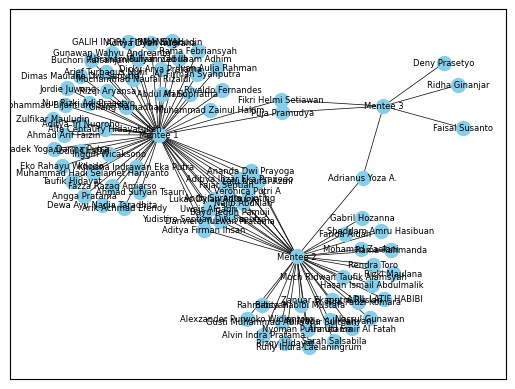

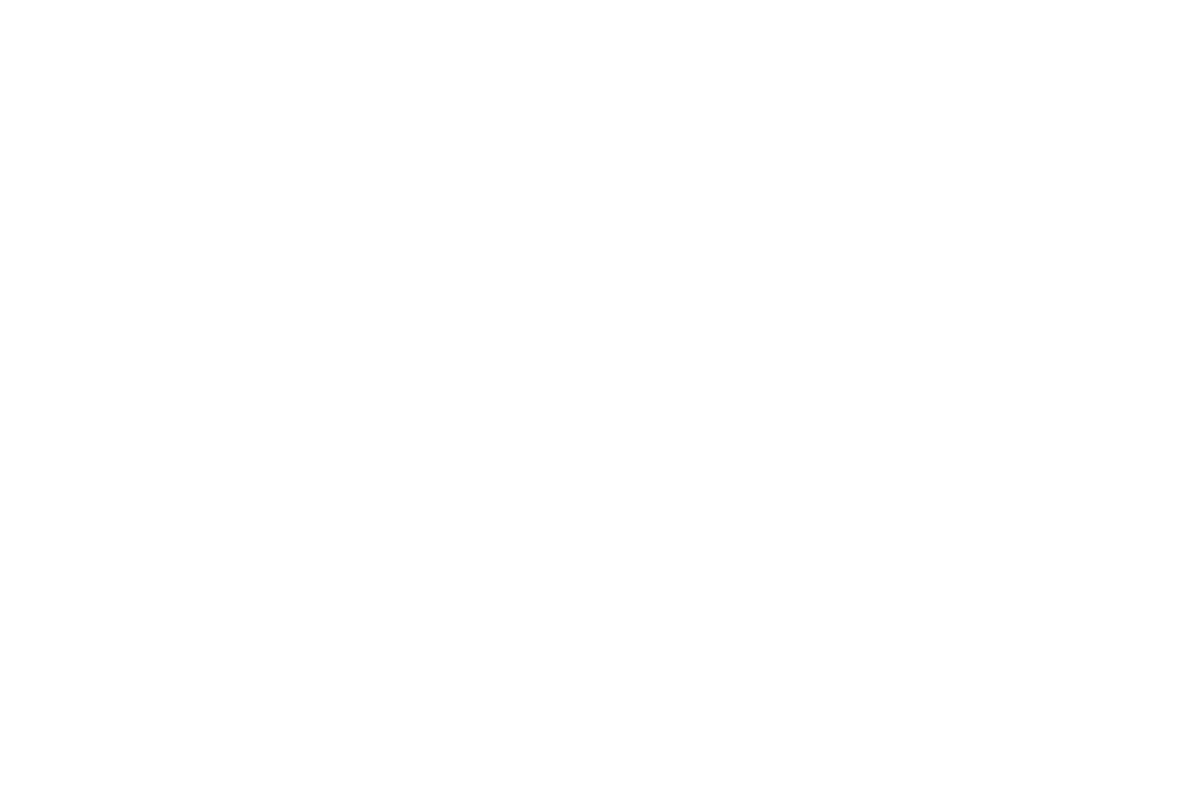

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# ... (previous code remains the same)

# Melakukan pencocokan mentee dengan mentor
graph = nx.Graph()
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        for mentor, similarity_score in matched_mentors:
            graph.add_edge(mentee.name, mentor.name)
    else:
        print(f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")

# Visualisasi grafik dengan gambar yang lebih besar dan garis yang lebih panjang
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=100)
nx.draw_networkx_labels(graph, pos, font_size=6, font_family='sans-serif')
nx.draw_networkx_edges(graph, pos, width=0.5)  # Mengatur lebar garis menjadi 2.0
plt.figure(figsize=(15, 10))  # Menentukan ukuran gambar
plt.axis('off')
plt.show()







In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.1 MB/s eta 0:00:00


Dalam contoh di atas, kami menggunakan Flask sebagai kerangka kerja backend dan menentukan rute `/match_mentor` untuk menangani pencocokan mentee-mentor. Kami mengharapkan permintaan POST yang berisi data mentee dalam format JSON. Aplikasi Flask akan menjalankan server dan menghubungkan rute ke fungsi `match_mentor()`. Setelah pencocokan dilakukan, hasil pencocokan mentor akan dikembalikan sebagai respons dalam format JSON.

Pastikan untuk menyesuaikan rincian implementasi ini dengan kebutuhan dan struktur aplikasi backend Anda.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import tkinter as tk
from tkinter import messagebox

Untuk design GUInya

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

class Mentee:
    def __init__(self, name, needs):
        self.name = name
        self.needs = needs

class Mentor:
    def __init__(self, name, expertise, rating):
        self.name = name
        self.expertise = expertise
        self.rating = rating

class MentoringPlatform:
    def __init__(self):
        self.mentees = []
        self.mentors = []
        self.vectorizer = TfidfVectorizer()

    def add_mentee(self, mentee):
        self.mentees.append(mentee)

    def add_mentor(self, mentor):
        self.mentors.append(mentor)

    def preprocess_text(self, text):
        stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        preprocessed_text = ' '.join(filtered_tokens)
        return preprocessed_text

    def fit_vectorizer(self):
        corpus = []
        for mentee in self.mentees:
            corpus.append(self.preprocess_text(mentee.needs))
        for mentor in self.mentors:
            corpus.append(self.preprocess_text(mentor.expertise))
        self.vectorizer.fit(corpus)

    def find_mentor(self, mentee):
        mentee_needs = self.preprocess_text(mentee.needs)
        mentee_vector = self.vectorizer.transform([mentee_needs])

        matched_mentors = []
        for mentor in self.mentors:
            mentor_expertise = self.preprocess_text(mentor.expertise)
            mentor_vector = self.vectorizer.transform([mentor_expertise])

            similarity_score = cosine_similarity(mentee_vector, mentor_vector)[0][0]
            if similarity_score > 0:
                matched_mentors.append((mentor, similarity_score))
        matched_mentors = sorted(matched_mentors, key=lambda x: (x[1] + x[0].rating), reverse=True)

        return matched_mentors

    def match_mentee_mentor(self, mentee):
        matched_mentors = self.find_mentor(mentee)
        if len(matched_mentors) > 0:
            mentors_info = ""
            for mentor, similarity_score in matched_mentors:
                mentors_info += f"{mentor.name} ({mentor.expertise})\nSimilarity Score: {similarity_score}\nRating: {mentor.rating}\n\n"
            messagebox.showinfo("Matching Result", f"Mentee '{mentee.name}' cocok dengan mentor:\n\n{mentors_info}")
        else:
            messagebox.showinfo("Matching Result", f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")

# Membuat instance MentoringPlatform
platform = MentoringPlatform()

# Menambahkan mentees dan mentors ke platform
mentee1 = Mentee("Mentee 1", "Bagaimana cara saya bisa menjadi seorang Android Developer yang memiliki portofolio yang baik?")
mentee2 = Mentee("Mentee 2", "Saya membutuhkan bimbingan dalam pengembangan Software Engineer")
mentee3 = Mentee("Mentee 3", "I want to find a mentor who has experience with Cloud Architecture")
platform.add_mentee(mentee1)
platform.add_mentee(mentee2)
platform.add_mentee(mentee3)

# Menjalankan kode untuk menambahkan mentors ke platform dari dataframe
for index, row in df_mentor.iterrows():
    mentor_expertise = ' '.join(row['preferensi'].split()[:10])  # Mengambil maksimal 10 kata dari mentor.expertise
    mentor = Mentor(row['name'], mentor_expertise, row['rating'])
    platform.add_mentor(mentor)

# Melakukan fitting vectorizer
platform.fit_vectorizer()

# Membuat GUI
class MentoringGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Mentoring Platform")

        style = ttk.Style()
        style.configure("TLabel", font=("Arial", 12))
        style.configure("TButton", font=("Arial", 12))

        self.label_name = ttk.Label(root, text="Mentee Name:")
        self.label_name.pack(pady=10)
        self.entry_name = ttk.Entry(root, font=("Arial", 12))
        self.entry_name.pack()

        self.label_needs = ttk.Label(root, text="Mentee Needs:")
        self.label_needs.pack(pady=10)
        self.entry_needs = ttk.Entry(root, font=("Arial", 12))
        self.entry_needs.pack()

        self.match_button = ttk.Button(root, text="Find Mentor", command=self.match_mentee_mentor)
        self.match_button.pack(pady=20)

    def match_mentee_mentor(self):
        mentee_name = self.entry_name.get()
        mentee_needs = self.entry_needs.get()
        mentee = Mentee(mentee_name, mentee_needs)
        platform.match_mentee_mentor(mentee)

# Membuat GUI
root = tk.Tk()
root.geometry("600x400")  # Mengatur ukuran jendela

style = ttk.Style()
style.configure("TLabel", font=("Arial", 12))
style.configure("TButton", font=("Arial", 12), foreground="white", background="#4caf50", relief="raised")
style.map("TButton", foreground=[("active", "#ffffff"), ("disabled", "grey")], background=[("active", "#45a049"), ("disabled", "grey")], relief=[("active", "sunken"), ("disabled", "flat")])

mentoring_gui = MentoringGUI(root)
root.mainloop()
